In [1]:
# alignment of 2 confocal images (David Cox's lab)
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ref_img_fname = 'images/REF.tif'
test_img1_fname = 'images/tests/lens_BW_500ms.png'

In [3]:
ref_img = cv2.imread(ref_img_fname, 0)
test_img1 = cv2.imread(test_img1_fname, 0)

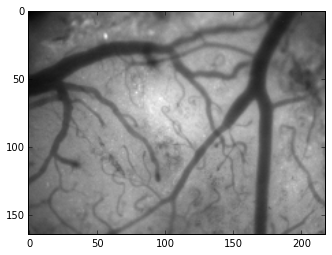

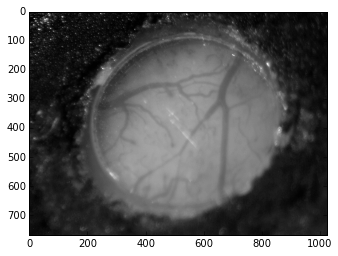

(<matplotlib.image.AxesImage at 0x10723cc50>, None)

In [4]:
plt.imshow(ref_img, cmap='gray', vmin=0., vmax=255.),plt.show()
plt.imshow(test_img1, cmap='gray', vmin=0., vmax=255.),plt.show()

In [5]:
def test_harris(img):
    # Use harris corner detection on the reference image
    img_harris = cv2.cornerHarris(img, 2, 5, 0.1)
    img_harris_dilated = cv2.dilate(img_harris, None)

    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Threshold for an optimal value, it may vary depending on the image.
    img_color[img_harris_dilated>0.01*img_harris_dilated.max()]=[0,0,255]
    
    return img_color



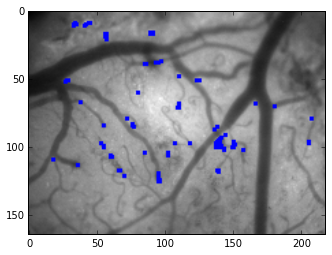

(<matplotlib.image.AxesImage at 0x10727f750>, None)

In [6]:
# Use harris corner detection on the reference image
ref_harris_img = test_harris(ref_img)

plt.imshow(ref_harris_img),plt.show()

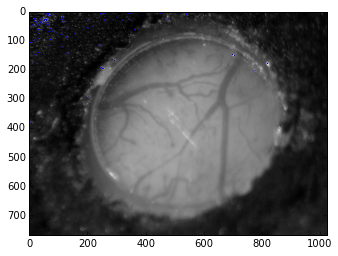

(<matplotlib.image.AxesImage at 0x107d33250>, None)

In [7]:
# Use harris corner detection on the test image
test1_harris_img = test_harris(test_img1)

plt.imshow(test1_harris_img),plt.show()

In [8]:
def test_good_features_to_track(img):
    corners = cv2.goodFeaturesToTrack(img,25,0.01,10)
    corners = np.int0(corners)

    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    for i in corners:
        x,y = i.ravel()
        cv2.circle(img_color,(x,y),3,255,-1)
    return img_color

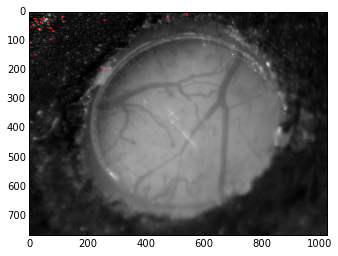

(<matplotlib.image.AxesImage at 0x107021e10>, None)

In [9]:
# Use harris corner detection on the test image
test1_good_features_to_track_img = test_good_features_to_track(test_img1)

plt.imshow(test1_good_features_to_track_img),plt.show()

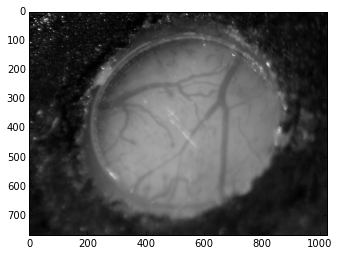

(<matplotlib.image.AxesImage at 0x10d677f50>, None)

In [10]:
# use a bilateral filter on the test image
test_img1_bilateral = cv2.bilateralFilter(test_img1, 5, 10, 250)

plt.imshow(test_img1_bilateral, cmap='gray', vmin=0, vmax=255),plt.show()

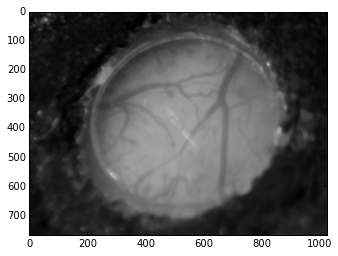

(<matplotlib.image.AxesImage at 0x1075050d0>, None)

In [11]:
# use a median filter on the test image
test_img1_med11 = cv2.medianBlur(test_img1, 11)

plt.imshow(test_img1_med11, cmap='gray', vmin=0, vmax=255),plt.show()

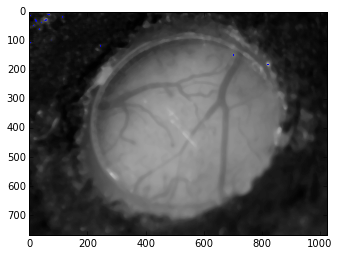

(<matplotlib.image.AxesImage at 0x10ed29090>, None)

In [12]:
# Use harris corner detection on the test image
test1_harris_med11_img = test_harris(test_img1_med11)

plt.imshow(test1_harris_med11_img),plt.show()

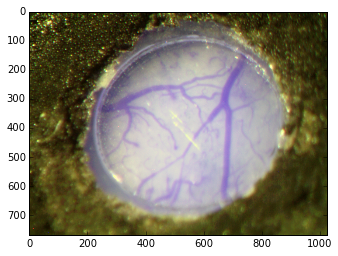

(<matplotlib.image.AxesImage at 0x10f574190>, None)

In [13]:
# Using a different test image
test_img2_fname = 'images/tests/lens_RGB_500ms.tif'
test_img2 = cv2.imread(test_img2_fname, cv2.CV_LOAD_IMAGE_COLOR)
plt.imshow(test_img2),plt.show()

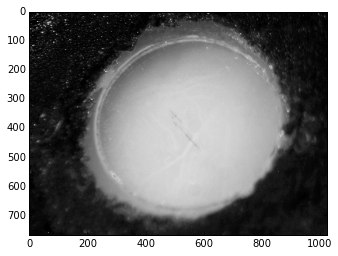

(<matplotlib.image.AxesImage at 0x10fac3110>, None)

In [14]:

plt.imshow(test_img2[:, :, 2], cmap='gray', vmin=0, vmax=255),plt.show()


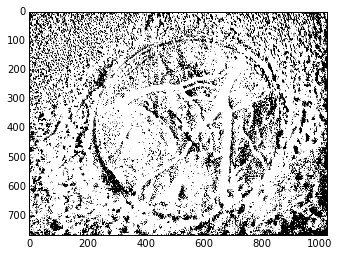

(<matplotlib.image.AxesImage at 0x10ba30050>, None)

In [15]:
red_mask = test_img2[:, :, 0] > test_img2[:, :, 1]

test_img2_red_only = np.zeros(test_img2.shape[:2], dtype=np.uint8)
test_img2_red_only[red_mask] = 255
plt.imshow(test_img2_red_only, cmap='gray', vmin=0, vmax=255),plt.show()

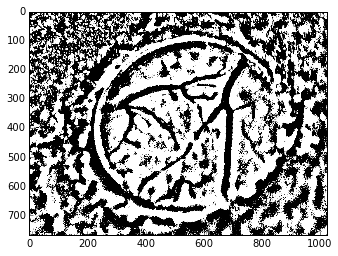

(<matplotlib.image.AxesImage at 0x110bb9050>, None)

In [16]:
test_img2_red_only_adapt_th2 = cv2.adaptiveThreshold(test_img2[:, :, 0], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 61, 2)
plt.imshow(test_img2_red_only_adapt_th2, cmap='gray', vmin=0, vmax=255),plt.show()

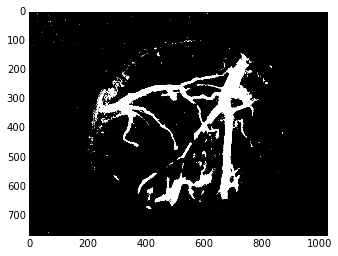

(<matplotlib.image.AxesImage at 0x110d009d0>, None)

In [17]:
mask1 = test_img2[:, :, 2] > (test_img2[:, :, 0] + 5)
mask2 = test_img2[:, :, 2] > (test_img2[:, :, 1] + 25)
#print mask1
global_mask = mask1 & mask2
#print np.sum(global_mask != mask1)

test_img2_red = np.zeros(test_img2.shape[:2], dtype=np.uint8)
test_img2_red[global_mask] = 255
plt.imshow(test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

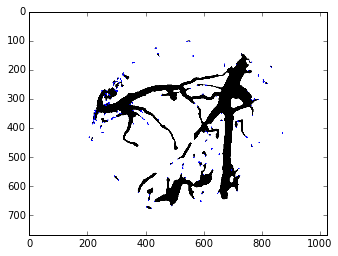

(<matplotlib.image.AxesImage at 0x110d3e250>, None)

In [18]:
test_img2_red_med5 = cv2.medianBlur(test_img2_red, 5)
test_img2_red_harris = test_harris(255-test_img2_red_med5)

plt.imshow(test_img2_red_harris),plt.show()

681


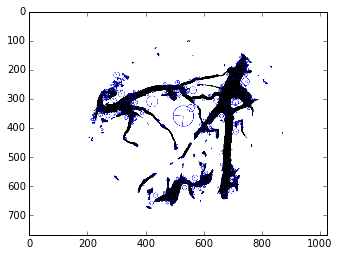

(<matplotlib.image.AxesImage at 0x111f91650>, None)

In [19]:
sift = cv2.SIFT()

sift_kp_test_img2_red_med5, sift_des_test_img2_red_med5 = sift.detectAndCompute(255-test_img2_red_med5, None)

print len(sift_kp_test_img2_red_med5)
img_sift_kp_test_img2_red_med5 = cv2.drawKeypoints(255-test_img2_red_med5, sift_kp_test_img2_red_med5, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift_kp_test_img2_red_med5, cmap='gray', vmin=0, vmax=255),plt.show()

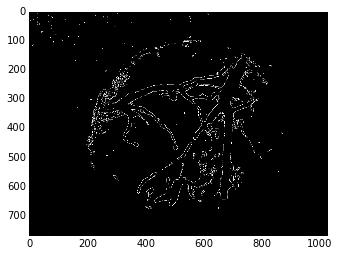

(<matplotlib.image.AxesImage at 0x108671390>, None)

In [20]:
canny_test_img2_red = cv2.Canny(255-test_img2_red, 50, 100)
plt.imshow(canny_test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

243


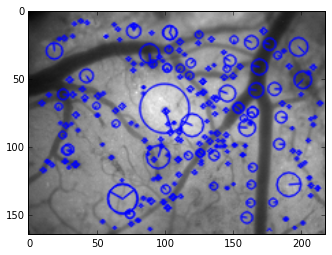

(<matplotlib.image.AxesImage at 0x1086ef050>, None)

In [21]:
sift_kp_ref_img, sift_des_ref_img = sift.detectAndCompute(ref_img, None)

print len(sift_kp_ref_img)
img_sift_ref_img = cv2.drawKeypoints(ref_img, sift_kp_ref_img, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

(768, 1024, 3)


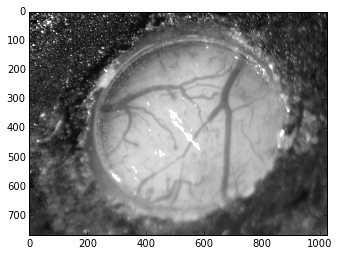

(<matplotlib.image.AxesImage at 0x108460ad0>, None)

In [22]:
# just take the red channel (blue in the image above)
test_img2_restricted = test_img2.copy()
test_img2_restricted[test_img2_restricted > 220] = 255
print test_img2_restricted.shape
#test_img2_red = test_img2[test_img2 > 50].reshape(test_img2.shape)
#print test_img2_red.shape
plt.imshow(test_img2_restricted[:, :, 1], cmap='gray', vmin=0, vmax=255),plt.show()

In [23]:
# Trying sift features on the 2nd image:
sift = cv2.SIFT()

sift_kp_test1, sift_des_test1 = sift.detectAndCompute(test_img1, None)

print len(sift_kp_test1)

583


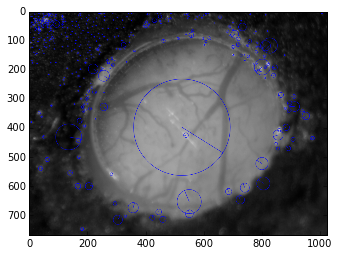

(<matplotlib.image.AxesImage at 0x10858fe10>, None)

In [24]:
img_sift_kp_test1 = cv2.drawKeypoints(test_img1, sift_kp_test1, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift_kp_test1, cmap='gray', vmin=0, vmax=255),plt.show()

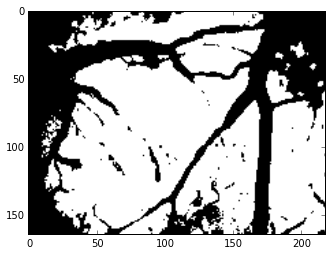

(<matplotlib.image.AxesImage at 0x10860bd10>, None)

In [25]:
# Take the 2 images, binary threshold them, and then use harris corner detection
ret, ref_img_thresh = cv2.threshold(ref_img,115,255,cv2.THRESH_BINARY)
plt.imshow(ref_img_thresh, cmap='gray', vmin=0, vmax=255),plt.show()

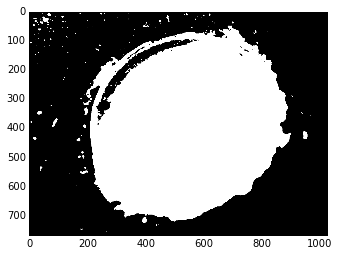

(<matplotlib.image.AxesImage at 0x109504610>, None)

In [26]:
ret, test_img1_thresh = cv2.threshold(test_img1,70,255,cv2.THRESH_BINARY)
plt.imshow(test_img1_thresh, cmap='gray', vmin=0, vmax=255),plt.show()

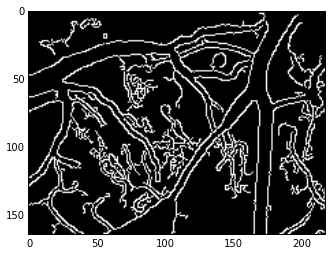

(<matplotlib.image.AxesImage at 0x10af4e610>, None)

In [27]:
# Use canny edge detector
canny_ref_img = cv2.Canny(ref_img, 50, 200)
plt.imshow(canny_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

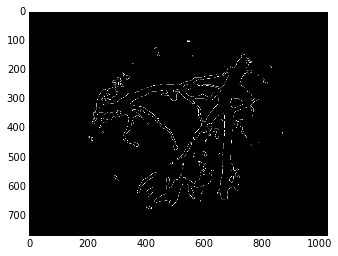

(<matplotlib.image.AxesImage at 0x10af7de50>, None)

In [28]:
canny_test_img2_red_med5 = cv2.Canny(test_img2_red_med5, 0, 10)
plt.imshow(canny_test_img2_red_med5, cmap='gray', vmin=0, vmax=255),plt.show()

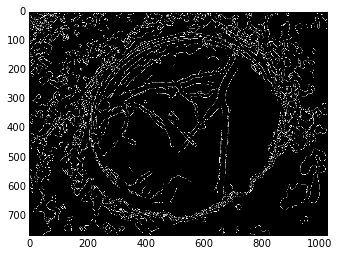

(<matplotlib.image.AxesImage at 0x10b284ad0>, None)

In [29]:
canny_test_img1_med11 = cv2.Canny(test_img1_med11, 10, 25)
plt.imshow(canny_test_img1_med11, cmap='gray', vmin=0, vmax=255),plt.show()

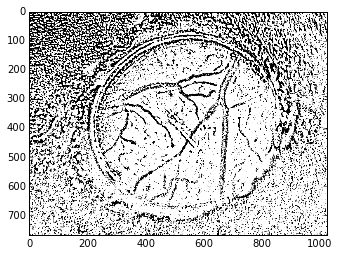

(<matplotlib.image.AxesImage at 0x10b39c090>, None)

In [30]:
test_img1_adapt_th1 = cv2.adaptiveThreshold(test_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(test_img1_adapt_th1, cmap='gray', vmin=0, vmax=255),plt.show()

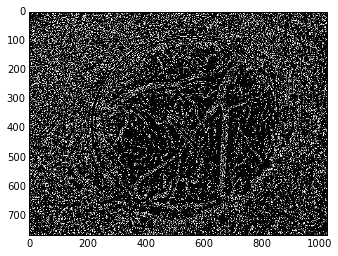

(<matplotlib.image.AxesImage at 0x10b947250>, None)

In [31]:
canny_test_img1_adapt_th1 = cv2.Canny(test_img1_adapt_th1, 10, 100)
plt.imshow(canny_test_img1_adapt_th1, cmap='gray', vmin=0, vmax=255),plt.show()

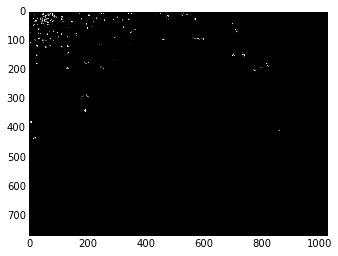

(<matplotlib.image.AxesImage at 0x1117a1290>, None)

In [32]:
canny_test_img1 = cv2.Canny(test_img1, 50, 200)
plt.imshow(canny_test_img1, cmap='gray', vmin=0, vmax=255),plt.show()

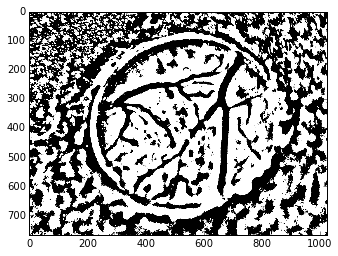

(<matplotlib.image.AxesImage at 0x112e1c350>, None)

In [33]:
test_img1_adapt_th2 = cv2.adaptiveThreshold(test_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 61, 2)
plt.imshow(test_img1_adapt_th2, cmap='gray', vmin=0, vmax=255),plt.show()

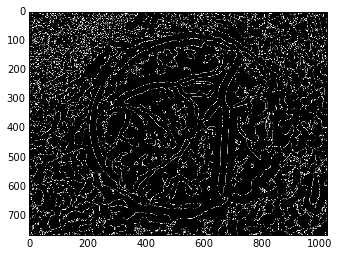

(<matplotlib.image.AxesImage at 0x11778a350>, None)

In [34]:
canny_test_img1_adapt_th2 = cv2.Canny(test_img1_adapt_th2, 10, 20)
plt.imshow(canny_test_img1_adapt_th2, cmap='gray', vmin=0, vmax=255),plt.show()

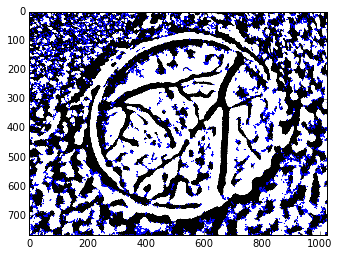

(<matplotlib.image.AxesImage at 0x119cbc2d0>, None)

In [35]:
harris_test_img1_adapt_th2 = test_harris(test_img1_adapt_th2)

plt.imshow(harris_test_img1_adapt_th2),plt.show()

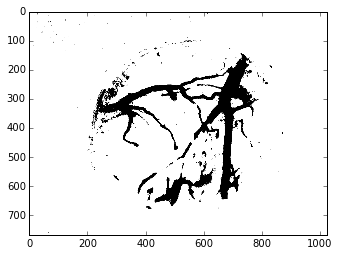

(<matplotlib.image.AxesImage at 0x1083c1390>, None)

In [36]:

plt.imshow(255-test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

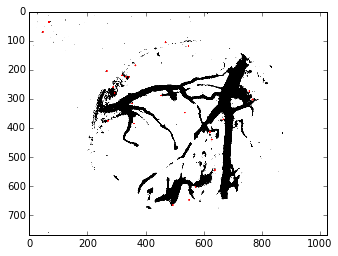

(<matplotlib.image.AxesImage at 0x1083f6c10>, None)

In [37]:
good_features_to_track_test_img2_red = test_good_features_to_track(255-test_img2_red)

plt.imshow(good_features_to_track_test_img2_red),plt.show()

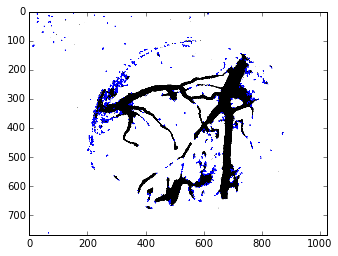

(<matplotlib.image.AxesImage at 0x11b5e2290>, None)

In [38]:
harris_test_img2_red = test_harris(255-test_img2_red)

plt.imshow(harris_test_img2_red),plt.show()

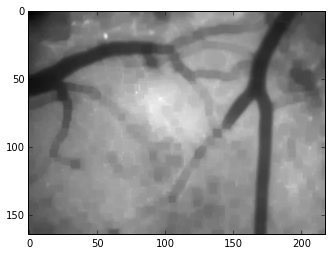

(<matplotlib.image.AxesImage at 0x11bf2f650>, None)

In [39]:
kernel = np.ones((5,5),np.uint8)
closing_ref_img = cv2.morphologyEx(ref_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

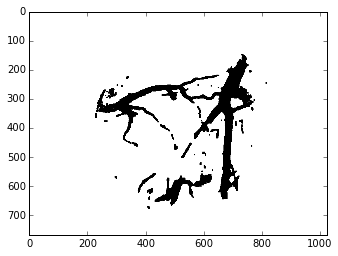

(<matplotlib.image.AxesImage at 0x11c9f1fd0>, None)

In [40]:
kernel = np.ones((5,5),np.uint8)
closing_test_img2_red = cv2.morphologyEx(255-test_img2_red, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing_test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

In [41]:
def skeletonize(img):
    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)

    ret,img = cv2.threshold(img,100,255,0)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255),plt.show()
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    img = 255 - img
    img = cv2.dilate(img, element, iterations=3)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255),plt.show()


    #ret, img = cv2.threshold(img, 100, 255, 0)
    #element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False
 
    while( not done):
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True

    return skel

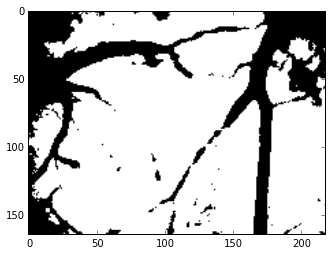

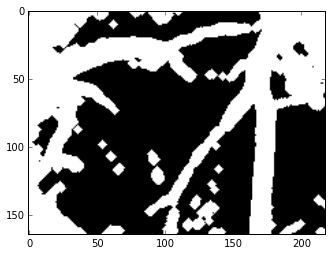

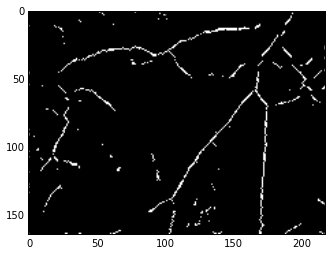

(<matplotlib.image.AxesImage at 0x11d174110>, None)

In [42]:
skeleton_ref_img = skeletonize(ref_img)
plt.imshow(skeleton_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

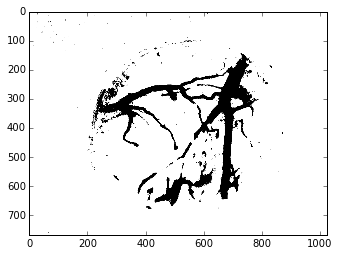

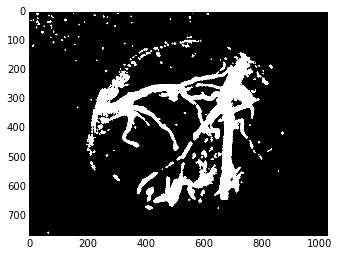

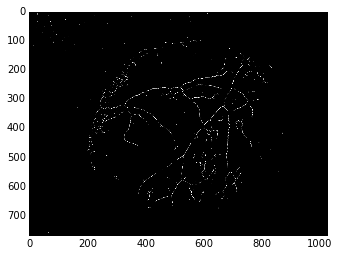

(<matplotlib.image.AxesImage at 0x11e490bd0>, None)

In [43]:
skeleton_test_img2_red = skeletonize(255-test_img2_red)
plt.imshow(skeleton_test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

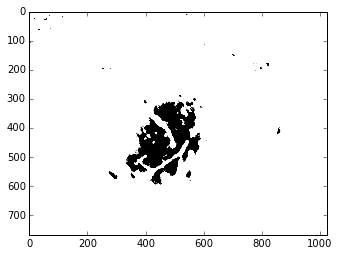

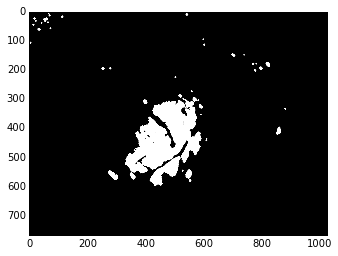

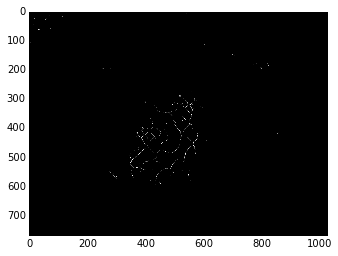

(<matplotlib.image.AxesImage at 0x11dcddfd0>, None)

In [44]:
skeleton_test_img1 = skeletonize(255-test_img1)
plt.imshow(skeleton_test_img1, cmap='gray', vmin=0, vmax=255),plt.show()

In [45]:
dir(cv2)

['ADAPTIVE_SKIN_DETECTOR_MORPHING_METHOD_ERODE',
 'ADAPTIVE_SKIN_DETECTOR_MORPHING_METHOD_ERODE_DILATE',
 'ADAPTIVE_SKIN_DETECTOR_MORPHING_METHOD_ERODE_ERODE',
 'ADAPTIVE_SKIN_DETECTOR_MORPHING_METHOD_NONE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'ANN_MLP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_TRAIN_PARAMS_BACKPROP',
 'ANN_MLP_TRAIN_PARAMS_RPROP',
 'ANN_MLP_UPDATE_WEIGHTS',
 'Algorithm__create',
 'Algorithm_getList',
 'BFMatcher',
 'BOOST_DEFAULT',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_GINI',
 'BOOST_LOGIT',
 'BOOST_MISCLASS',
 'BOOST_REAL',
 'BOOST_SQERR',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',
 'BORDER_REFLECT_101',
 'BORDER_REPLICATE',
 'BORDER_TRANSPARENT',
 'BORDER_WRAP',
 'BRISK',
 'BackgroundSubtractorMOG',
 'BackgroundSubtractorMOG2',
 'Boost',
 'CALIB_CB_ADAPTIVE_THRESH',
 'CALIB_CB_ASYMMETRIC_GRID'

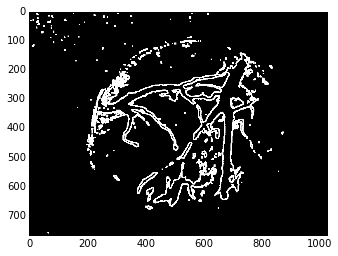

(<matplotlib.image.AxesImage at 0x11cef1190>, None)

In [46]:
kernel = np.ones((5,5),np.uint8)
gradient_test_img2_red = cv2.morphologyEx(255-test_img2_red, cv2.MORPH_GRADIENT , kernel)
plt.imshow(gradient_test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

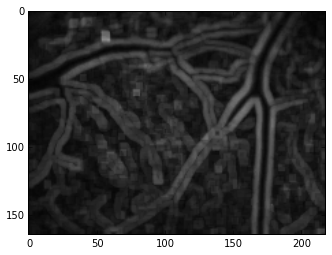

(<matplotlib.image.AxesImage at 0x11ef38410>, None)

In [47]:
kernel = np.ones((5,5),np.uint8)
gradient_ref_img = cv2.morphologyEx(255-ref_img, cv2.MORPH_GRADIENT , kernel)
plt.imshow(gradient_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

1753


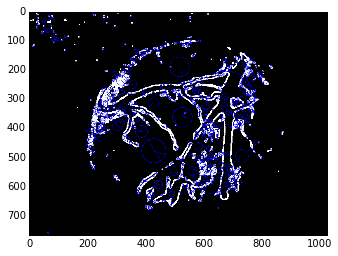

(<matplotlib.image.AxesImage at 0x11cece410>, None)

In [48]:
sift_kp_gradient_test_img2_red, sift_des_gradient_test_img2_red = sift.detectAndCompute(gradient_test_img2_red, None)
print len(sift_kp_gradient_test_img2_red)
img_sift_gradient_test_img2_red = cv2.drawKeypoints(gradient_test_img2_red, sift_kp_gradient_test_img2_red, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift_gradient_test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

301


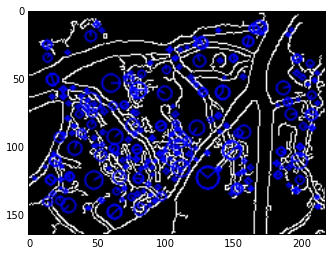

(<matplotlib.image.AxesImage at 0x109c386d0>, None)

In [49]:

sift_kp_canny_ref_img, sift_des_canny_ref_img = sift.detectAndCompute(canny_ref_img, None)
print len(sift_kp_canny_ref_img)
img_sift_canny_ref_img = cv2.drawKeypoints(canny_ref_img, sift_kp_canny_ref_img, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift_canny_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

In [50]:
# Taken from http://stackoverflow.com/questions/20259025/module-object-has-no-attribute-drawmatches-opencv-python
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        print("({},{}) -> ({},{})".format(x1, y1, x2, y2))
        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        rand_color = np.random.rand(3,) * 255
        cv2.circle(out, (int(x1),int(y1)), 4, rand_color, 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, rand_color, 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), rand_color, 3)


    # Show the image
    #cv2.imshow('Matched Features', out)
    #cv2.waitKey(0)
    #cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out

(189.847900391,17.5891666412) -> (579.770507812,296.125549316)
(189.847900391,17.5891666412) -> (579.770507812,296.125549316)
(143.223739624,49.088142395) -> (612.119873047,299.854705811)
(18.3394966125,104.942337036) -> (553.688110352,301.133026123)
(152.44203186,130.446884155) -> (787.116516113,493.078857422)


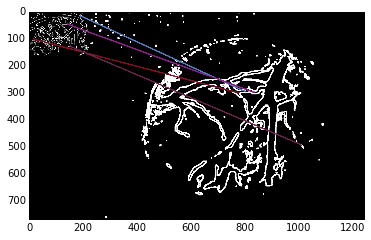

(<matplotlib.image.AxesImage at 0x109f7c490>, None)

In [51]:
# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.knnMatch(sift_des_canny_ref_img, sift_des_gradient_test_img2_red, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = drawMatches(canny_ref_img, sift_kp_canny_ref_img, gradient_test_img2_red, sift_kp_gradient_test_img2_red, good)
plt.imshow(img3),plt.show()

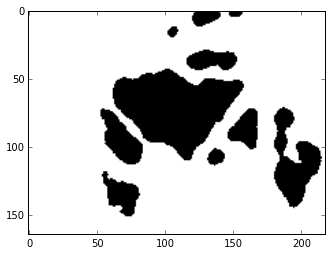

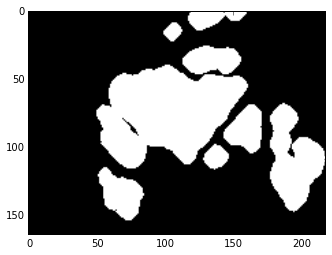

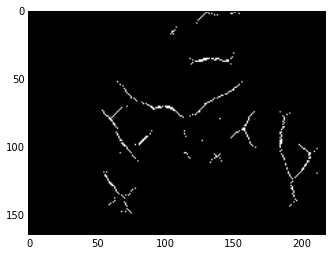

(<matplotlib.image.AxesImage at 0x10a1d8910>, None)

In [52]:
skeleton_ref_img_med11 = skeletonize(cv2.medianBlur(255-ref_img, 11))
plt.imshow(skeleton_ref_img_med11, cmap='gray', vmin=0, vmax=255),plt.show()

In [53]:
import scipy.ndimage.morphology as morph
def skeletonize_morph(img):
    
    ret,img = cv2.threshold(img,100,255,0)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255),plt.show()
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    img = 255 - img
    img = cv2.dilate(img, element, iterations=3)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255),plt.show()


    h1 = np.array([[0, 0, 0],[0, 1, 0],[1, 1, 1]]) 
    m1 = np.array([[1, 1, 1],[0, 0, 0],[0, 0, 0]]) 
    h2 = np.array([[0, 0, 0],[1, 1, 0],[0, 1, 0]]) 
    m2 = np.array([[0, 1, 1],[0, 0, 1],[0, 0, 0]])    
    hit_list = [] 
    miss_list = []
    for k in range(4): 
        hit_list.append(np.rot90(h1, k))
        hit_list.append(np.rot90(h2, k))
        miss_list.append(np.rot90(m1, k))
        miss_list.append(np.rot90(m2, k))    
    img = img.copy()
    while True:
        last = img
        for hit, miss in zip(hit_list, miss_list): 
            hm = morph.binary_hit_or_miss(img, hit, miss) 
            img = np.logical_and(img, np.logical_not(hm)) 
        plt.imshow(img, cmap='gray', vmin=0, vmax=255),plt.show()
        if np.all(img == last):  
            break
    return img


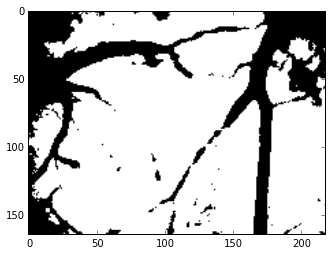

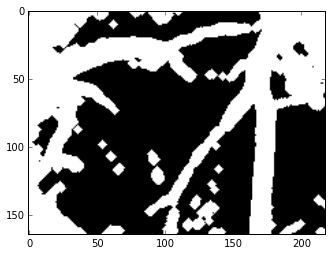

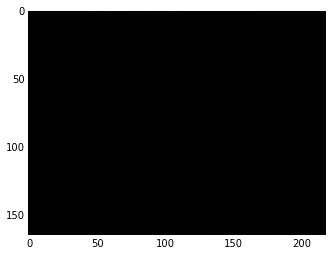

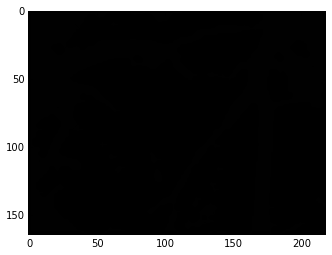

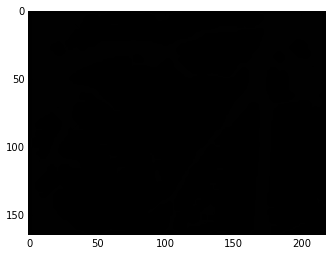

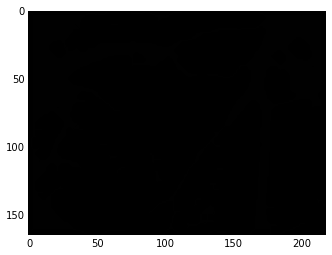

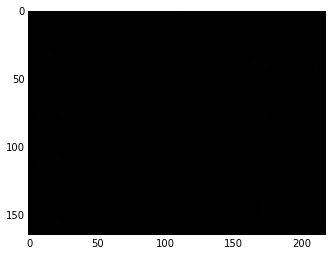

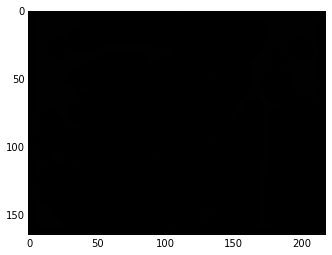

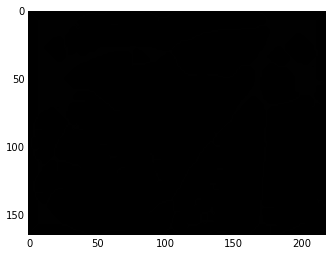

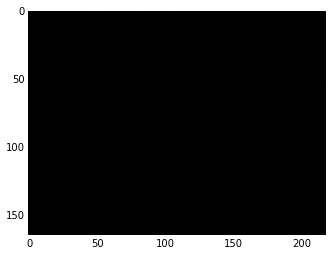

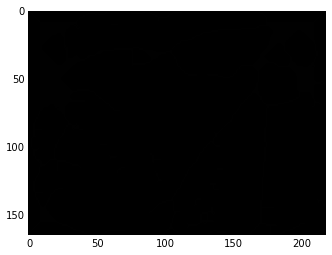

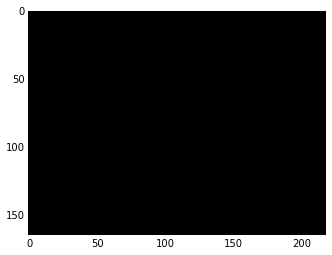

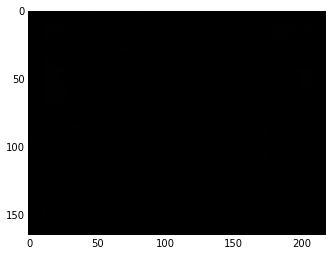

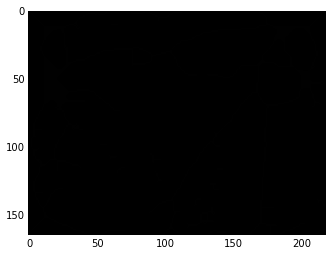

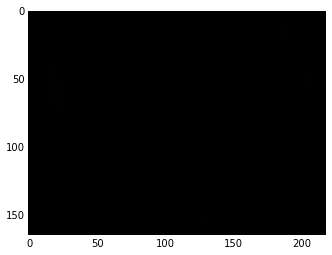

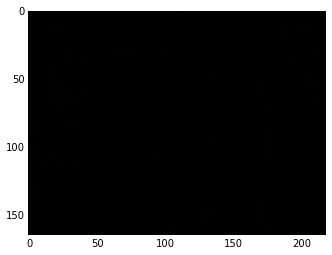

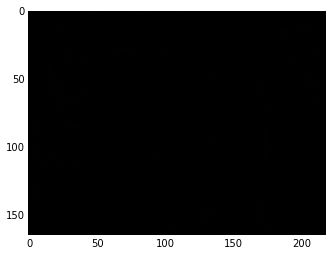

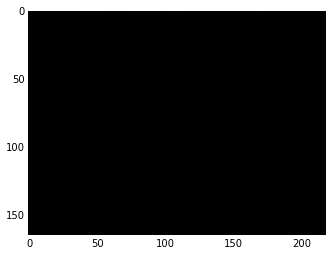

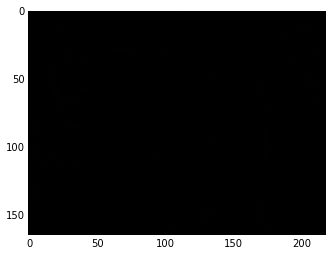

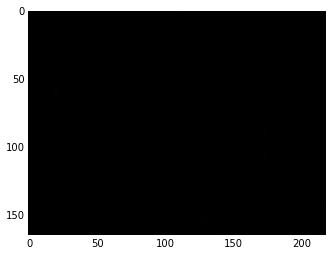

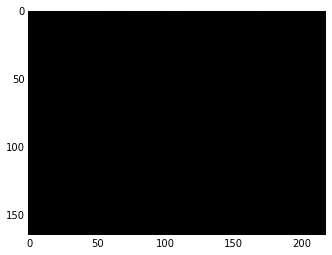

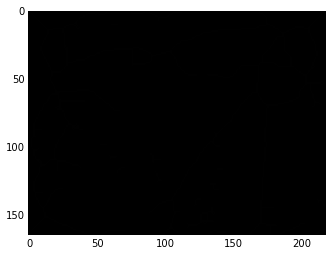

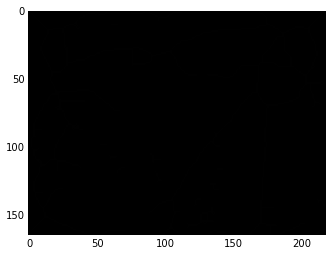

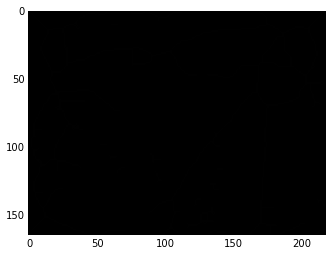

(<matplotlib.image.AxesImage at 0x114efbc10>, None)

In [54]:
skel_morph_ref_img = skeletonize_morph(ref_img)
plt.imshow(skel_morph_ref_img, cmap='gray', vmin=0, vmax=255),plt.show()

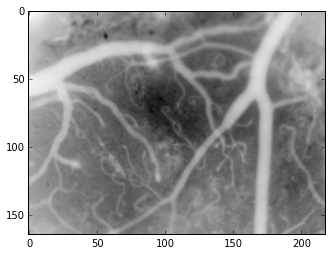

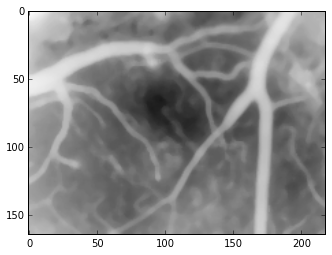

(<matplotlib.image.AxesImage at 0x113c22350>, None)

In [55]:
# trying something different
plt.imshow(255-ref_img, cmap='gray', vmin=0, vmax=255),plt.show()
plt.imshow(cv2.medianBlur(255-ref_img, 5), cmap='gray', vmin=0, vmax=255),plt.show()

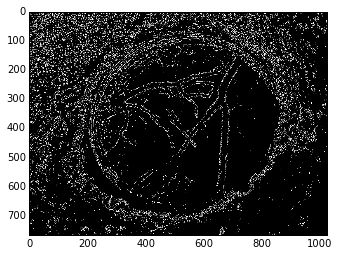

(<matplotlib.image.AxesImage at 0x1139ef850>, None)

In [56]:
# Retrying canny detector on the test image
canny_test_img1 = cv2.Canny(test_img1, 20, 25, 10)
plt.imshow(canny_test_img1, cmap='gray', vmin=0, vmax=255),plt.show()

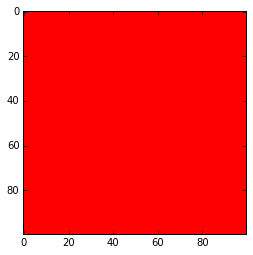

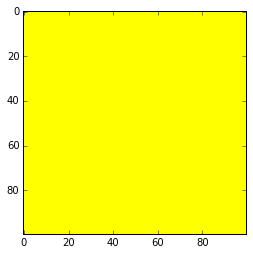

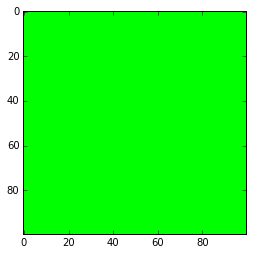

(<matplotlib.image.AxesImage at 0x114ffbf10>, None)

In [60]:
# Make sure that an image of RG does show a different color
empty_img = np.zeros((100, 100, 3), dtype=np.uint8)
empty_img[:, :, 0] = 255
plt.imshow(empty_img),plt.show()
empty_img[:, :, 1] = 255
plt.imshow(empty_img),plt.show()
empty_img[:, :, 0] = 0
plt.imshow(empty_img),plt.show()

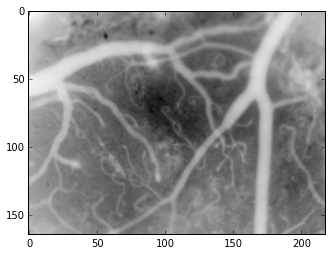

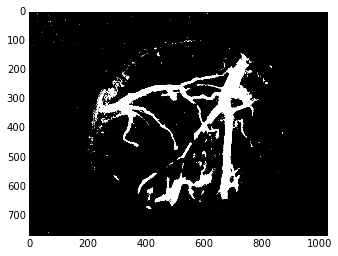

(<matplotlib.image.AxesImage at 0x11d05d310>, None)

In [84]:
# try different approaches to do a cross correlation
ref_img_inv = 255 - ref_img
plt.imshow(ref_img_inv, cmap='gray', vmin=0., vmax=255.),plt.show()
plt.imshow(test_img2_red, cmap='gray', vmin=0, vmax=255),plt.show()

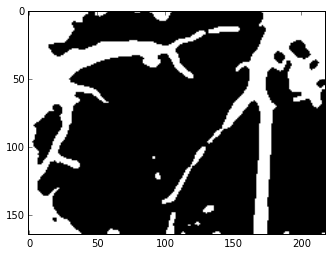

(<matplotlib.image.AxesImage at 0x120846ed0>, None)

In [90]:
# first, threshold the reference image
ret, ref_img_inv_thresh = cv2.threshold(cv2.medianBlur(ref_img_inv, 5),150,255,cv2.THRESH_BINARY)
plt.imshow(ref_img_inv_thresh, cmap='gray', vmin=0., vmax=255.),plt.show()


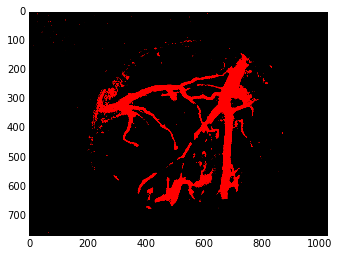

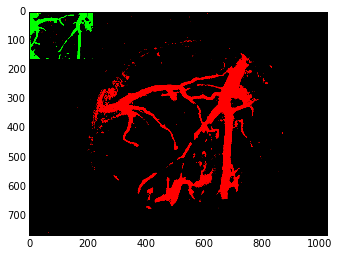

(<matplotlib.image.AxesImage at 0x1248c4350>, None)

In [91]:
merged_image = np.zeros((test_img2_red.shape[0], test_img2_red.shape[1], 3), dtype=np.uint8)
merged_image[:, :, 0] = test_img2_red
plt.imshow(merged_image),plt.show()
merged_image[:ref_img_inv_thresh.shape[0], :ref_img_inv_thresh.shape[1], 1] = ref_img_inv_thresh
plt.imshow(merged_image),plt.show()


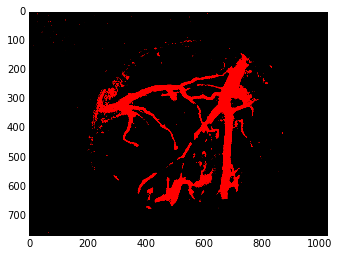

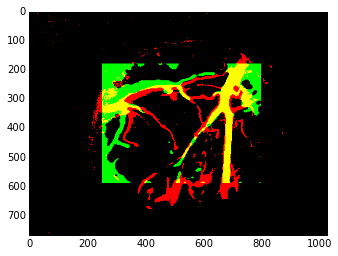

(<matplotlib.image.AxesImage at 0x12a41ec10>, None)

In [93]:
# do some scaling and translation
tx, ty = (250, 180)
merged_image = np.zeros((test_img2_red.shape[0], test_img2_red.shape[1], 3), dtype=np.uint8)
merged_image[:, :, 0] = test_img2_red
plt.imshow(merged_image),plt.show()
ref_img_inv_thresh_scale = cv2.resize(ref_img_inv_thresh, (0, 0), fx=2.5, fy=2.5)
merged_image[ty:ty+ref_img_inv_thresh_scale.shape[0], tx:tx+ref_img_inv_thresh_scale.shape[1], 1] = ref_img_inv_thresh_scale
plt.imshow(merged_image),plt.show()



(248, 190) 0.510661244392


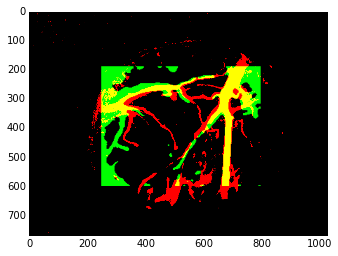

(<matplotlib.image.AxesImage at 0x12a455690>, None)

In [96]:
# given the above already scaled image, use template matching to find the translation
res = cv2.matchTemplate(test_img2_red, ref_img_inv_thresh_scale, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
print top_left, max_val

merged_image_temp_match = np.zeros((test_img2_red.shape[0], test_img2_red.shape[1], 3), dtype=np.uint8)
merged_image_temp_match[:, :, 0] = test_img2_red
merged_image_temp_match[top_left[1]:top_left[1]+ref_img_inv_thresh_scale.shape[0], top_left[0]:top_left[0]+ref_img_inv_thresh_scale.shape[1], 1] = ref_img_inv_thresh_scale
plt.imshow(merged_image_temp_match),plt.show()

In [101]:
def temp_match(img, template, temp_scale):
    template_scaled = cv2.resize(template, (0, 0), fx=temp_scale, fy=temp_scale)
    res = cv2.matchTemplate(img, template_scaled, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    return top_left, max_val


In [100]:
# now let's automatically detect the scaling
scale_range = np.arange(1, 4, 0.2)
print scale_range

[ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8]


In [103]:
match_by_scale = [temp_match(test_img2_red, ref_img_inv_thresh, scale) for scale in scale_range]
for scale, match_val in zip(scale_range, match_by_scale):
    print "Scale {}: p={}, v={}".format(scale, match_val[0], match_val[1])


Scale 1.0: p=(493, 554), v=0.540099978447
Scale 1.2: p=(460, 552), v=0.52092808485
Scale 1.4: p=(670, 330), v=0.499489188194
Scale 1.6: p=(668, 267), v=0.486972391605
Scale 1.8: p=(368, 203), v=0.499704778194
Scale 2.0: p=(333, 199), v=0.556037724018
Scale 2.2: p=(296, 198), v=0.58892250061
Scale 2.4: p=(267, 192), v=0.557784616947
Scale 2.6: p=(229, 190), v=0.478549301624
Scale 2.8: p=(195, 174), v=0.430105924606
Scale 3.0: p=(160, 163), v=0.394280970097
Scale 3.2: p=(126, 154), v=0.347393542528
Scale 3.4: p=(89, 181), v=0.307737767696
Scale 3.6: p=(54, 178), v=0.292698085308
Scale 3.8: p=(18, 145), v=0.268545746803


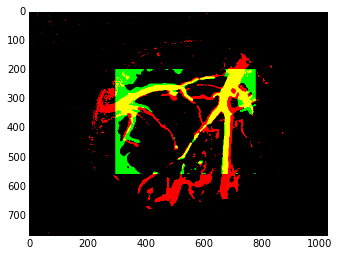

(<matplotlib.image.AxesImage at 0x12a3c6a90>, None)

In [107]:
# showing best result
max_idx = np.argmax(np.array(match_by_scale)[:, 1])
best_scale = scale_range[max_idx]
best_translation = match_by_scale[max_idx][0]

merged_image_temp_match = np.zeros((test_img2_red.shape[0], test_img2_red.shape[1], 3), dtype=np.uint8)
merged_image_temp_match[:, :, 0] = test_img2_red
ref_img_inv_thresh_scale_best = cv2.resize(ref_img_inv_thresh, (0, 0), fx=best_scale, fy=best_scale)
merged_image_temp_match[best_translation[1]:best_translation[1]+ref_img_inv_thresh_scale_best.shape[0], best_translation[0]:best_translation[0]+ref_img_inv_thresh_scale_best.shape[1], 1] = ref_img_inv_thresh_scale_best
plt.imshow(merged_image_temp_match),plt.show()

In [ ]:
M =np.array([[]])
cv2.warpAffine(img, M)